<img src="./img/metro_madrid.jpg" alt="drawing" width="500"/>

# Transporte y renta en la Comunidad de Madrid

### TEMA

Este proyecto busca arrojar luz sobre los patrones de comportamiento en el transporte de los ciudadanos de la Comunidad de Madrid, estudiando posibles vínculos con su renta. Para ello, se utiliza la [Encuesta de Movilidad del Consorcio Regional](https://datos.comunidad.madrid/dataset/resultados-edm2018) de Transportes de Madrid (CRTM), realizada en el 2018.

Para los cálculos de la renta, se utilizan diferentes tablas extraídas de la [Encuesta de Condiciones de Vida](https://ine.es/dyngs/INEbase/es/operacion.htm?c=Estadistica_C&cid=1254736176807&menu=ultiDatos&idp=1254735976608) del INE, para el año 2018

### HIPÓTESIS

La hipótesis principal de este proyecto es que **existe una relación entre la renta y el uso del transporte en la Comunidad de Madrid**. En concreto, se buscará contrastar:
+ Si las rentas más altas eligen el coche como primera opción para desplazamientos laborales y por placer.
+ Las rentas bajas, para trabajar, utilizan más el transporte público que el coche.
+ Las mujeres utilizan más el transporte público para desplazamientos laborales, sin tener en cuenta la renta.
    + Lo que, unido al segundo punto, explicaría que las mujeres no usan más el transporte público por deseo sino por necesidad.
+ Los hombres utilizan más el transporte privado para desplazamientos por placer


### SUPUESTOS
Dados los datos utilizados, hemos de tener en cuenta varios puntos:
+ Se está utilizando la última encuesta publicada por el CRTM (en serio).
    + Sí se cuentan con los datos de uso del Metro de Madrid, que en 2023 volvieron a niveles pre-pandemia. Por tanto, podemos suponer que no han cambiado las pautas de comportamiento en un nivel agregado
+ No contamos con la renta de los encuestados. Para ello generaremos un dato *proxy*, que estimaremos en función de las condiciones socioeconómicas de los encuestados (edad, ocupación, género, grado de educación, y si cuenta con coche).
    + Renta != Riqueza. Estimaremos la cantidad de **generar** , no de **poseer**. Una persona sin trabajo pero con patrimonio no quedará reflejada en este estudio.
    + Por disponibilidad de los datos, se utilizarán las medias de las rentas. En función de disponibilidad de los datos, es posible que se recoja la media española en lugar de la de la Comunidad de Madrid.
+ Los datos sólo tienen en cuenta días estrictamente laborales (Lunes-Jueves)
+ Si bien no tiene impacto a primera vista sobre las hipótesis, se realizará un estudio de impacto de la **meteorología** sobre el uso de unos u otros medios transportes.


## OBTENCIÓN DE LOS DATOS

### DATASETS Y FUENTES ALTERNATIVAS DE DATOS

In [1]:
import hashlib
import requests
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from utils import utils as ut
df_transp = pd.DataFrame(pd.read_csv("./data/treated/transp.csv"))


In [2]:
###TODO: Comparar medias y medianas de transp_dry_work
###TODO: Sacar boxplots por sexo y por dry/rain y por occupation
###TODO: Iniciar la presentación con noticias de desigualdad

In [3]:
### TODO: Medians comparison
df_transp_dry_work = df_transp[(df_transp["weather"] == "dry") & (df_transp["reason"] == "work")] 
df_transp_rain_work = df_transp[(df_transp["weather"] == "rain") & (df_transp["reason"] == "work")] 


transp_medians_dry = df_transp_dry_work.groupby('transport')['income'].mean().sort_index(ascending=True)
transp_medians_rain = df_transp_rain_work.groupby('transport')['income'].mean().sort_index(ascending=True)
transp_medians=pd.concat([transp_medians_dry,transp_medians_rain],axis=1)
transp_medians

,income,income
transport,,
bike,280.081281,269.527559
car,274.892624,274.497706
motorbike,284.365079,283.599287
other,275.708861,271.569444
public,262.801276,262.596404
taxi,283.877273,281.854331
walking,268.063372,268.771374


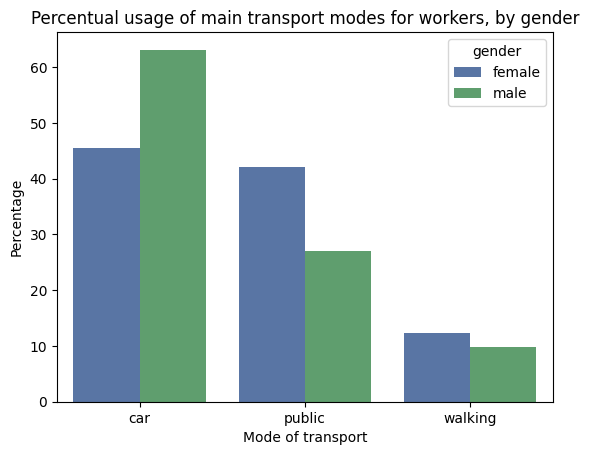

In [122]:
### TODO: Hypo 2
### TODO: Debería poder utilizar corr aquí
plt.style.use('seaborn-v0_8-deep')
df_transp_2 = df_transp[(df_transp["weather"] == "dry") & (df_transp["reason"] == "work") & (df_transp["transport"].isin(["car","public","walking"]))]
df_transp_2 = df_transp_2.groupby(['transport','gender'])[['id_indiv']].count().unstack()
df_transp_2 = round(df_transp_2/df_transp_2.sum()*100,1).stack(future_stack=True).reset_index()
df_transp_2
plt.figure()
sns.barplot(data=df_transp_2,x='transport',y='id_indiv',hue='gender',errorbar=None)
plt.title("Percentual usage of main transport modes for workers, by gender")
plt.xlabel("Mode of transport")
plt.ylabel("Percentage")
plt.savefig('./img/plots/bars/percen_transport_workers_gender.png')
plt.show();


In [5]:
df_transp.columns

Index(['id_indiv', 'id_trip', 'start_trip', 'transport', 'freq', 'reason',
       'distance', 'trip_pond', 'gender', 'age', 'spanish', 'studies',
       'activity', 'day', 'month', 'year', 'week_day', 'datemerge', 'tmed',
       'prec', 'weather', 'income'],
      dtype='object')